# PILOT 2

##### Helena Blackmore
##### May 2021

In [199]:
import warnings;
warnings.filterwarnings('ignore');
from IPython.display import display


In [217]:
!jupyter nbconvert --no-input pilot2_analysis.ipynb --to slides 

[NbConvertApp] Converting notebook pilot2_analysis.ipynb to slides
[NbConvertApp] Writing 438765 bytes to pilot2_analysis.slides.html


In [32]:
%run pilot2_wrangling.ipynb #magic that runs data cleaning notebook

In [33]:
plt.rcParams['figure.dpi'] = 120
import numpy as np

In [60]:

data["response"].fillna("NA", inplace = True)


- plot age distribution
- first choice beer
- firstchoice na beer
- number who switched

# Participants

## Age & Drink preference

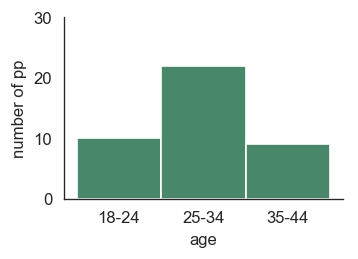

In [61]:
data_age = data.drop_duplicates( subset = 'subject')
data_age = data_age.dropna()
data_age = data_age.sort_values(['age_response']).reset_index(drop=True)
data_age['age_response'] = data_age['age_response'].replace(
   ['18-24 years old','25-34 years old','35-44 years old'],['18-24','25-34','35-44'])
data_age.head()

plt.subplots(1, 1, sharex=True, sharey=False, figsize=(3,2))
ax=sns.histplot(data=data_age,x="age_response",
            stat= 'count',
            color= 'xkcd:spruce')
ax.set(xlabel="age", ylabel='number of pp')
ax.set(ylim=(0, 30))
sns.despine()
plt.show()


In [62]:
# pp who chose NA

na_data = data[(data['trialnum'] < 3)] 
na_data = na_data[na_data['response'] == 'NA_n']
na_data = na_data[na_data.subject!=80] 
na_preference=na_data.subject.nunique()
na_preference



12

In [63]:
##people  who chose beer

beer_data = data[(data['trialnum'] < 3)] 
beer_data = beer_data[beer_data['response'] == 'beer']
beer_data = beer_data[beer_data.subject!=81] 
beer_data
beer_preference=beer_data.subject.nunique()
beer_preference

33

In [64]:
data.subject.nunique()

45

In [65]:
# switch from na to beer (and vice versa)
# get last trial data  remove duplicates, keep last

data_last = data.drop_duplicates(subset='subject', keep = 'last') #last trial data

# filter those who chose beer in the last trial - response == NA
switch_A=data_last[data_last.response == 'NA']

switched_to_NA = switch_A.subject.nunique() 




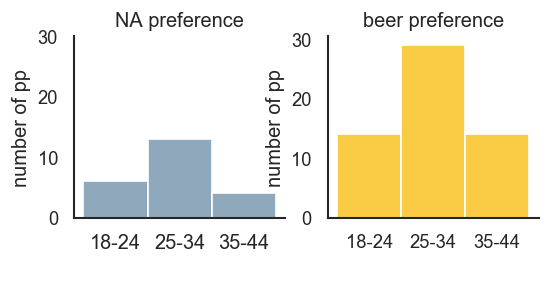

In [206]:
beer_age = beer_data.dropna()
beer_age = beer_age.sort_values(['age_response']).reset_index(drop=True)
na_data = na_data.sort_values(['age_response']).reset_index(drop=True)

beer_age['age_response'] = beer_age['age_response'].replace(
   ['18-24 years old','25-34 years old','35-44 years old'],['18-24','25-34','35-44'])

fig, axes = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(5,2))
fig.suptitle('')

axes[0].set_title('NA preference')
axes[0].set(xlabel=' ', ylabel='number of pp')

ticks= ['18-24','25-34','35-44']
axes[0].set_xticklabels(ticks, fontsize='medium')
axes[0].set_xticks(range(3))


plot1=sns.histplot(ax=axes[0],data=na_data, x="age_response",
                  color= 'xkcd:grey blue')

sns.despine()

axes[1].set_title('beer preference')
axes[1].set(xlabel=' ', ylabel='number of pp') 
plot2=sns.histplot(ax=axes[1],data=beer_age,x="age_response",
            stat= 'count',
            color= 'xkcd:golden rod')

plot1.set(ylim=(0, 30))
plt.show()

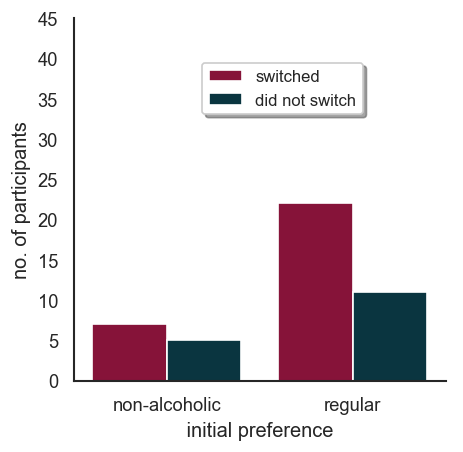

In [204]:
# preference 
# data_step.drop(data_step.tail(1).index,inplace=True) 
# data_step.tail()
data_step['trialcode'] = data_step['trialcode'].replace(
   ['trial_n','trial_e'],['non-alcoholic','regular'])


mypal3=['#990033','#013b49']
sns.set_style("white")
plt.figure(figsize=(4, 4))
plot11=sns.countplot(x='trialcode', hue= 'switched', data=data_step, palette=mypal3)

plot11.set(xlabel=' initial preference ', ylabel='no. of participants')
plot11.set(ylim=(0, 45))

plot11.legend(fontsize =10,title="",shadow=True,
          labels=['switched', 'did not switch'], bbox_to_anchor= (0.8, 0.9), facecolor = 'white')
sns.despine()
plt.show()


In [143]:
# table
from tabulate import tabulate
#from IPython.display import display

table = [['','initially NA', 'initially beer', 'total'], ['switched','7', '22', '29'], ['did not switch', '5', '11', '16']]
#display(table)
print(tabulate(table,headers='',  tablefmt="fancy_grid"))


╒════════════════╤══════════════╤════════════════╤═══════╕
│                │ initially NA │ initially beer │ total │
├────────────────┼──────────────┼────────────────┼───────┤
│ switched       │ 7            │ 22             │ 29    │
├────────────────┼──────────────┼────────────────┼───────┤
│ did not switch │ 5            │ 11             │ 16    │
╘════════════════╧══════════════╧════════════════╧═══════╛


## incentive analysis

In [67]:
# amount required to switch (from beer to NA)
# i need to rewrite

# switch dataset: take beer data, remove final check response, remove duplicates, keep last

data_switch=data[(data.trialcode!='check_finalE')]

data_switch=data_switch.drop_duplicates(subset = 'subject', keep = 'last')
data_switch_na = data_switch[data_switch.trialcode == 'trial_n']



data_switch_na # dataset of those who preferred NA beer (12 in total)
data_switch_na.groupby('correct').count() # 7 switched, 5 did not
#data_switch_na

,trialnum,trialcode,response,stimulusitem1,stimulusitem2,values.k,subject,age_response,step
correct,,,,,,,,,
0,7,7,7,7,7,7,7,7,7
1,5,5,5,5,5,5,5,5,5


In [68]:
# remove text from stimulus1 and rename correct to switch

data_switch_na['stimulusitem1'] = data_switch_na['stimulusitem1'].str.replace("regular beer \(4.5% ABV\)       and £", '', regex=True)
data_switch_na['stimulusitem1'] = pd.to_numeric(data_switch_na['stimulusitem1'])
data_switch_na['correct']=data_switch_na['correct'].replace(
   [1,0],['no','yes'])
data_switch_na = data_switch_na.rename(columns={"correct": "switched"})


C:\Users\Helena\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Helena\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Helena\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

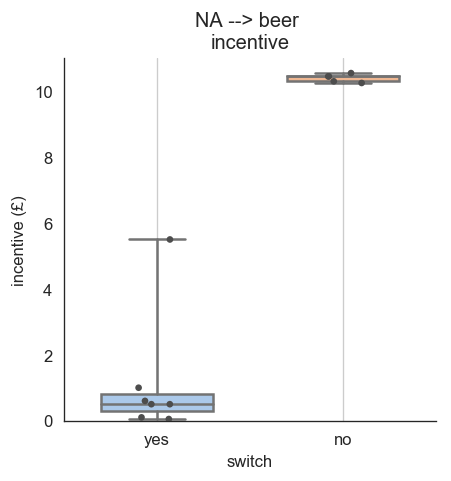

In [44]:
# plot this

f, ax = plt.subplots(figsize=(4, 4))
#ax.set_yscale("log")
plot3 = sns.boxplot(x="switched", y="stimulusitem1", data=data_switch_na,
            whis=[0, 100], width=.6, palette="pastel")

ax.set_title('NA --> beer \nincentive') 
plot3.set(ylim=(0, 11))



# Add in points to show each observation
sns.stripplot(x="switched", y="stimulusitem1", data=data_switch_na,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.set(xlabel='switch', ylabel='incentive (£)')
ax.xaxis.grid(True)
sns.despine()


In [69]:
# amount required to switch (from beer to NA)

data_switch_beer = data_switch[data_switch.trialcode == 'trial_e']
data_switch_beer # dataset of those who preferred NA beer (33 in total)

data_switch_beer.groupby('correct').count() # 22 switched, 11 did not


,trialnum,trialcode,response,stimulusitem1,stimulusitem2,values.k,subject,age_response,step
correct,,,,,,,,,
0,22,22,22,22,22,22,22,18,22
1,11,11,11,11,11,11,11,11,11


In [70]:
data_switch_beer['stimulusitem2'] = data_switch_beer['stimulusitem2'].str.replace("non-alcoholic beer \(0.0% ABV\)       and £", '', regex=True)
data_switch_beer['stimulusitem2'] = pd.to_numeric(data_switch_beer['stimulusitem2'])
data_switch_beer['correct']=data_switch_beer['correct'].replace(
   [1,0],['no','yes'])
data_switch_beer = data_switch_beer.rename(columns={"correct": "switched"})
#data_switch_beer

C:\Users\Helena\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Helena\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Helena\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

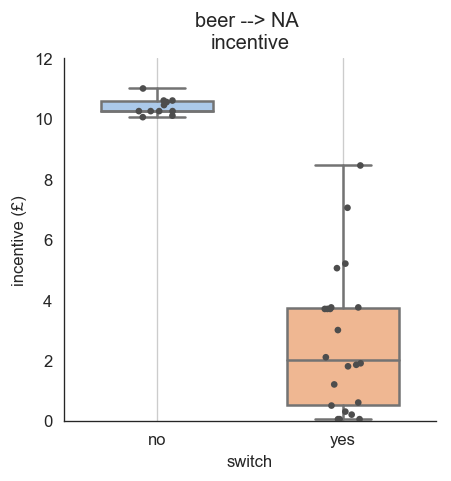

In [47]:

f, ax = plt.subplots(figsize=(4, 4))
#ax.set_yscale("log")
plot4 = sns.boxplot(x="switched", y="stimulusitem2", data=data_switch_beer,
            whis=[0, 100], width=.6, palette="pastel")

ax.set_title('beer --> NA \nincentive') 
plot4.set(ylim=(0, 12))



# Add in points to show each observation
sns.stripplot(x="switched", y="stimulusitem2", data=data_switch_beer,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.set(xlabel='switch', ylabel='incentive (£)')
ax.xaxis.grid(True)
sns.despine()

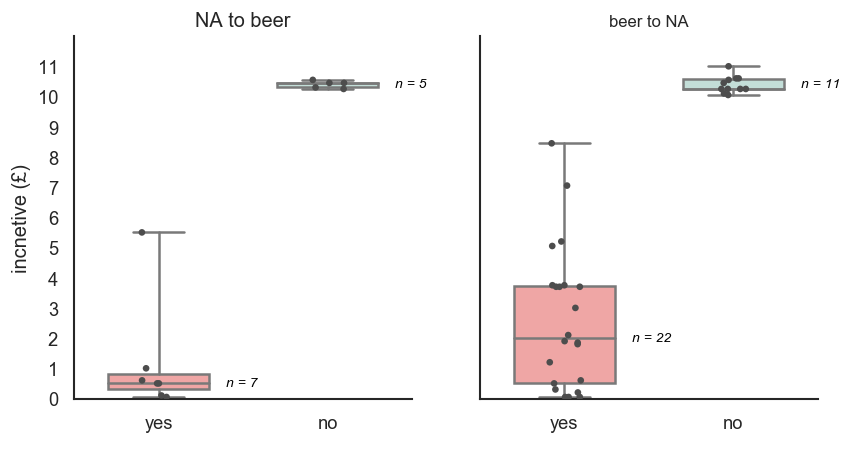

In [210]:
# put both plots together
#colours
my_pal = {"yes": "#fb9a99", "no": "#bee3db"}
ticks=range(0,12)

fig, axes = plt.subplots(1, 2, sharex=False, sharey=True, figsize=(8,4))
#fig.suptitle('Drink Preference and Incentive', fontsize = 16)

axes[0].set_title('NA to beer', fontsize=12 )
plot5 = sns.boxplot(ax=axes[0], x="switched", y="stimulusitem1", data=data_switch_na,
            whis=[0, 100], width=.6,order=['yes','no'], palette=my_pal)
axes[0].set_yticks(ticks) 
axes[0].set_yticklabels(ticks) # set the labels



# Add in points to show each observation
plot7=sns.stripplot(ax=axes[0], x="switched", y="stimulusitem1", data=data_switch_na,
               size=4, color=".3", linewidth=0)

#####################################
axes[1].set_title('beer to NA', fontsize=10)
plot6=sns.boxplot(ax=axes[1], x="switched", y="stimulusitem2", data=data_switch_beer,
            whis=[0, 100], width=.6, palette=my_pal, order=['yes','no'])

plot8=sns.stripplot(ax=axes[1], x="switched", y="stimulusitem2", data=data_switch_beer,order=['yes','no'],
              size=4, color=".3", linewidth=0)
######################################################
plot5.set(ylim=(0, 12))
plot6.set(ylim=(0, 12))
sns.despine(ax =axes[1])
sns.despine(ax =axes[0])
axes[0].set(xlabel=' ', ylabel='incnetive (£)')
axes[1].set(xlabel=' ', ylabel=' ')

plt.text(0.4, 1.9, "n = 22", horizontalalignment='left', size='x-small', color='black', fontstyle='italic')
plt.text(1.4, 10.3, "n = 11", horizontalalignment='left', size='x-small', color='black', fontstyle='italic')
plt.text(-2.0, 0.4, "n = 7 ", horizontalalignment='left', size='x-small', color='black', fontstyle='italic')
plt.text(-1, 10.3, "n = 5", horizontalalignment='left', size='x-small', color='black', fontstyle='italic')
plt.show()


## step size before switch



In [ ]:
# analyse the two datasets separately
# i need two last trials
# create a variable that will be the difference between last two trials
# only interested in those who switched both beer and NA prefernce

In [71]:
# data (both beer and na):

trials=['trial_e', 'trial_n']
data_step=data[data.trialcode.isin(trials)]
 # data with all experimental trials, checks removed





,trialnum,trialcode,response,correct,stimulusitem1,stimulusitem2,values.k,subject,age_response,step
2,3,trial_n,beer_n,0,regular beer (4.5% ABV) and £ 1,non-alcoholic beer (0.0% ABV),0.013400,42,25-34 years old,
6,3,trial_n,NA_n,1,regular beer (4.5% ABV) and £ 0.2,non-alcoholic beer (0.0% ABV),24.000000,57,35-44 years old,
7,4,trial_n,NA_n,1,regular beer (4.5% ABV) and £ 0.25,non-alcoholic beer (0.0% ABV),24.000000,57,35-44 years old,
8,5,trial_n,NA_n,1,regular beer (4.5% ABV) and £ 0.35,non-alcoholic beer (0.0% ABV),24.000000,57,35-44 years old,
9,6,trial_n,NA_n,1,regular beer (4.5% ABV) and £ 1.35,non-alcoholic beer (0.0% ABV),24.000000,57,35-44 years old,
10,7,trial_n,NA_n,1,regular beer (4.5% ABV) and £ 1.85,non-alcoholic beer (0.0% ABV),24.000000,57,35-44 years old,
11,8,trial_n,NA_n,1,regular beer (4.5% ABV) and £ 2.35,non-alcoholic beer (0.0% ABV),24.000000,57,35-44 years old,
12,9,trial_n,NA_n,1,regular beer (4.5% ABV) and £ 2.45,non-alcoholic beer (0.0% ABV),24.000000,57,35-44 years old,
13,10,trial_n,NA_n,1,regular beer (4.5% ABV) and £ 2.65,non-alcoholic beer (0.0% ABV),24.000000,57,35-44 years old,
14,11,trial_n,NA_n,1,regular beer (4.5% ABV) and £ 2.7,non-alcoholic beer (0.0% ABV),24.000000,57,35-44 years old,


In [72]:
# get the stimulus items numeric
data_step['stimulusitem1'] = data_step['stimulusitem1'].str.replace("regular beer \(4.5% ABV\)       and £", '', regex=True)
data_step['stimulusitem1'] = data_step['stimulusitem1'].str.replace("regular beer \(4.5% ABV\)", '0', regex=True)
data_step['stimulusitem1'] = pd.to_numeric(data_step['stimulusitem1'])

data_step['stimulusitem2'] = data_step['stimulusitem2'].str.replace("non-alcoholic beer \(0.0% ABV\)       and £", '', regex=True)
data_step['stimulusitem2'] = data_step['stimulusitem2'].str.replace("non-alcoholic beer \(0.0% ABV\)", '0', regex=True)

data_step['stimulusitem2'] = pd.to_numeric(data_step['stimulusitem2'])





C:\Users\Helena\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Helena\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Helena\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [73]:


#length=len(data_step.subject)

data_step['step']=''

for i in range(1,length):
    if data_step.iloc[i,1] == 'trial_n':
         data_step.iloc[i,9] = data_step.iloc[i,4] - data_step.iloc[i-1,4]
    else:
         data_step.iloc[i,9] = data_step.iloc[i,5] - data_step.iloc[i-1,5]
        
data_step

C:\Users\Helena\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Helena\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,trialnum,trialcode,response,correct,stimulusitem1,stimulusitem2,values.k,subject,age_response,step
2,3,trial_n,beer_n,0,1.00,0.00,0.013400,42,25-34 years old,
6,3,trial_n,NA_n,1,0.20,0.00,24.000000,57,35-44 years old,-0.8
7,4,trial_n,NA_n,1,0.25,0.00,24.000000,57,35-44 years old,0.05
8,5,trial_n,NA_n,1,0.35,0.00,24.000000,57,35-44 years old,0.1
9,6,trial_n,NA_n,1,1.35,0.00,24.000000,57,35-44 years old,1
10,7,trial_n,NA_n,1,1.85,0.00,24.000000,57,35-44 years old,0.5
11,8,trial_n,NA_n,1,2.35,0.00,24.000000,57,35-44 years old,0.5
12,9,trial_n,NA_n,1,2.45,0.00,24.000000,57,35-44 years old,0.1
13,10,trial_n,NA_n,1,2.65,0.00,24.000000,57,35-44 years old,0.2
14,11,trial_n,NA_n,1,2.70,0.00,24.000000,57,35-44 years old,0.05


In [76]:
# #  # then drop duplicates

data_step = data_step.drop_duplicates(subset = 'subject', keep= 'last')




data_step_switch = data_step[data_step.stimulusitem1 <10]
data_step_switch = data_step_switch[data_step.stimulusitem2 <10]
data_step_switch 

data_step['step2']=data_step['step']



data_step['step'] = pd.to_numeric(data_step['step'])

for i in range(len(data_step.subject)):
    
    if data_step.iloc[i,9] < 0 :
        data_step.iloc[i,10] = data_step.iloc[i,4] + data_step.iloc[i,5]
    else:
        data_step.iloc[i,10] = data_step.iloc[i,9] 



C:\Users\Helena\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [77]:
data_step['correct']=data_step['correct'].replace(
   [1,0],['no','yes'])
data_step= data_step.rename(columns={"correct": "switched", 'step2':'last_step'})
data_step

,trialnum,trialcode,response,switched,stimulusitem1,stimulusitem2,values.k,subject,age_response,step,last_step
2,3,trial_n,beer_n,yes,1.00,0.00,0.013400,42,25-34 years old,NaN,NaN
33,30,trial_n,NA_n,no,10.55,0.00,24.000000,57,35-44 years old,1.00,1.00
62,29,trial_n,NA_n,no,10.45,0.00,9.790000,58,25-34 years old,1.00,1.00
96,35,trial_e,beer,no,0.00,11.00,0.000279,62,25-34 years old,1.00,1.00
121,26,trial_e,NA,yes,0.00,8.45,0.000129,72,18-24 years old,1.00,1.00
125,4,trial_e,NA,yes,0.00,0.05,24.000000,77,35-44 years old,-8.40,0.05
135,10,trial_e,NA,yes,0.00,1.90,24.000000,80,25-34 years old,0.05,0.05
139,3,trial_n,beer_n,yes,0.05,0.00,24.000000,81,25-34 years old,0.05,0.05
168,29,trial_e,beer,no,0.00,10.25,0.039600,99,25-34 years old,1.00,1.00
182,15,trial_e,NA,yes,0.00,3.75,0.006710,104,25-34 years old,0.05,0.05


In [88]:
data_step= data_step.fillna(1)
data_step

,trialnum,trialcode,response,switched,stimulusitem1,stimulusitem2,values.k,subject,age_response,step,last_step
2,3.0,trial_n,beer_n,yes,1.00,0.00,0.013400,42.0,25-34 years old,1.00,1.00
33,30.0,trial_n,NA_n,no,10.55,0.00,24.000000,57.0,35-44 years old,1.00,1.00
62,29.0,trial_n,NA_n,no,10.45,0.00,9.790000,58.0,25-34 years old,1.00,1.00
96,35.0,trial_e,beer,no,0.00,11.00,0.000279,62.0,25-34 years old,1.00,1.00
121,26.0,trial_e,NA,yes,0.00,8.45,0.000129,72.0,18-24 years old,1.00,1.00
125,4.0,trial_e,NA,yes,0.00,0.05,24.000000,77.0,35-44 years old,-8.40,0.05
135,10.0,trial_e,NA,yes,0.00,1.90,24.000000,80.0,25-34 years old,0.05,0.05
139,3.0,trial_n,beer_n,yes,0.05,0.00,24.000000,81.0,25-34 years old,0.05,0.05
168,29.0,trial_e,beer,no,0.00,10.25,0.039600,99.0,25-34 years old,1.00,1.00
182,15.0,trial_e,NA,yes,0.00,3.75,0.006710,104.0,25-34 years old,0.05,0.05


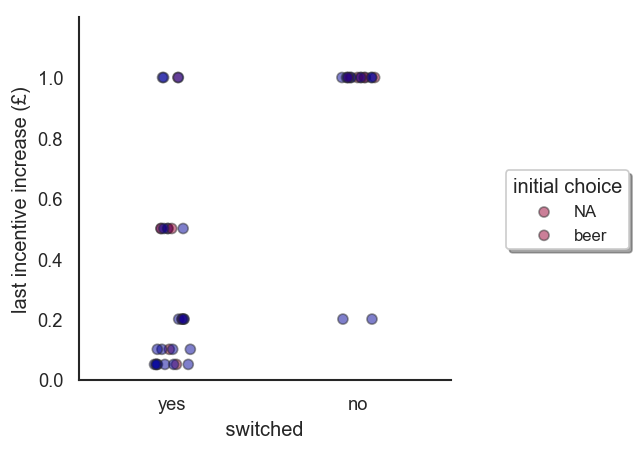

In [202]:
ticks2=np.arange(0, 1.2, 0.2)
ticks2= [round(num, 1) for num in ticks2]
mypal2=['#990033','#000099']
sns.set_style("white")
plt.figure(figsize=(4, 4))




plot10=sns.stripplot( x="switched", y="last_step", hue="trialcode", data=data_step, order=['yes','no'],
              size=6, alpha =0.50,jitter=0.1, dodge = False,  linewidth=1, palette=mypal2)

sns.despine()
plot10.set(xlabel=' switched ', ylabel='last incentive increase (£)')
plot10.set(ylim=(0, 1.2))
plot10.set_yticks(ticks2) 
plot10.set_yticklabels(ticks2)


# Improve the legend 
plot10.legend(fontsize =10,title="initial choice",shadow=True,
          labels=['NA', 'beer'], bbox_to_anchor= (1.5, 0.6), facecolor = 'white')
#plt.legend(title='initial choice',labels=['NA', 'beer'])
#plt.text(0.1, 0.05, "\u21FD they switched early", horizontalalignment='left', size='xx-small', color='black', fontstyle='italic')
plt.show()

<Figure size 720x480 with 0 Axes>

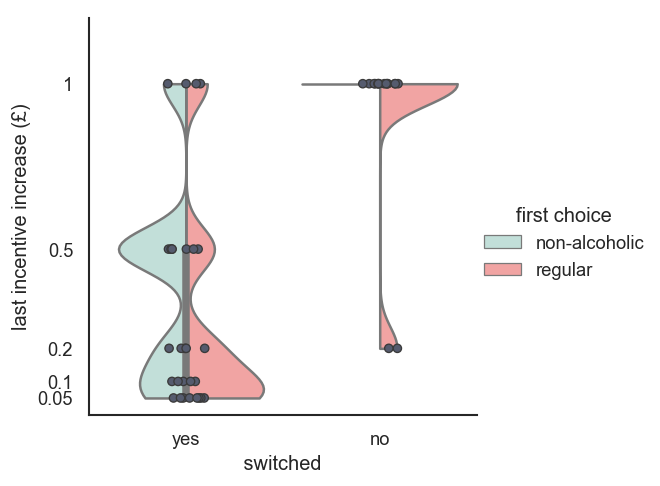

In [216]:
my_pal = {"regular": "#fb9a99", "non-alcoholic": "#bee3db"}
ticks3=[0.05, 0.1,0.2, 0.5, 1]
plt.figure(figsize=(6, 4))

ax2=sns.catplot(x="switched", y="last_step",
            hue="trialcode", 
            data=data_step,
             height=4, aspect=1,split = True, saturation=0.8,  palette=my_pal,
            kind="violin", dodge=True,alpha=0.001, cut=0, bw=.2, )
ax=sns.stripplot(x="switched",jitter=0.1, y="last_step", color = '#555b6e',linewidth=0.8, data=data_step)
ax2._legend.set_title('first choice')
    
ax.set(xlabel=' switched ', ylabel='last incentive increase (£)')
ax.set(ylim=(0, 1.2))
ax.set_yticks(ticks3) 
ax.set_yticklabels(ticks3)
plt.show()


In [90]:
data_step[data_step.last_step==0.05]

,trialnum,trialcode,response,switched,stimulusitem1,stimulusitem2,values.k,subject,age_response,step,last_step
125,4.0,trial_e,NA,yes,0.00,0.05,24.0000,77.0,35-44 years old,-8.40,0.05
139,3.0,trial_n,beer_n,yes,0.05,0.00,24.0000,81.0,25-34 years old,0.05,0.05
369,4.0,trial_e,NA,yes,0.00,0.05,24.0000,156.0,18-24 years old,-10.20,0.05
396,4.0,trial_e,NA,yes,0.00,0.05,0.0396,162.0,1,-0.15,0.05
